In [1]:
# 1. **Load the data**:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../../data/movie_ratings.csv')

In [2]:
# 2. **Explore the dataset**:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB
None
             user_id       movie_id         rating            age  \
count  212595.000000  212595.000000  212595.000000  212595.000000   
mean      464.525643     390.545173   

<Axes: title={'center': 'Breakdown of Rated Genres'}, xlabel='count', ylabel='genres'>

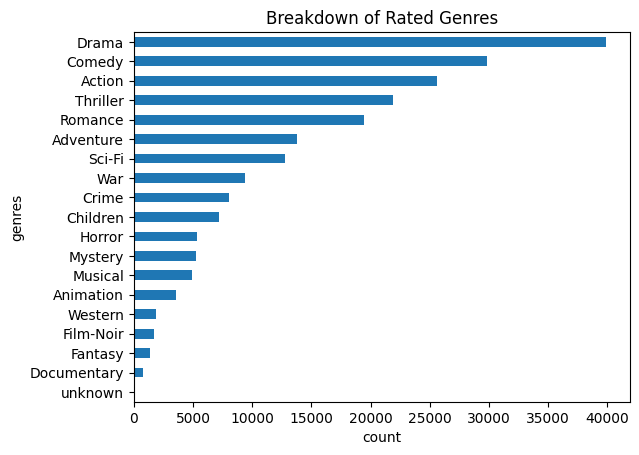

In [ ]:
# 1. What's the breakdown of genres for the movies that were rated?
df_genres = df.groupby('genres')['movie_id'].count()
df_genres.sort_values().plot(kind='barh', title='Breakdown of Rated Genres', xlabel='count')
# It looked like frequency was the best way to plot the breakdown because there're too many categories
# to do a pie chart and percentages on a bar graph look uncomprehensible. Unknown is too small of a number (I think 4)
# to see the count however. Overwhelming reviews for Drama movies.

(0.0, 5.0)

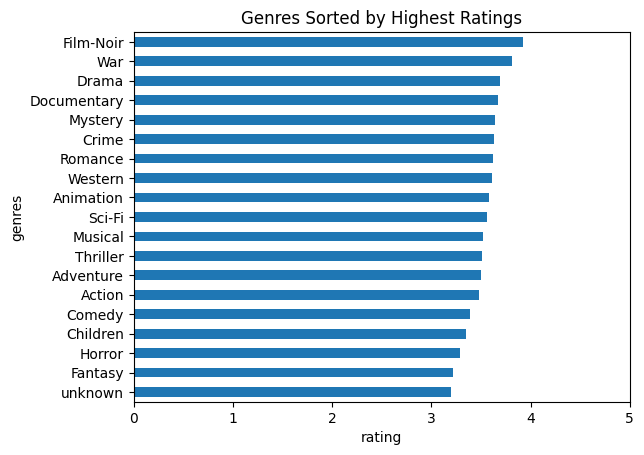

In [ ]:
# 2. Which genres have the highest viewer satisfaction (highest ratings)?
df_genre_ratings = df.groupby('genres')['rating'].mean()
ax = df_genre_ratings.sort_values().plot(kind='barh', title='Genres Sorted by Highest Ratings', xlabel='rating')
ax.set_xlim(0, 5.0)
# very close ratings. I interpreted highest ratings as average and this shows checking that by genre doesn't do too much.
# Movies can be good or bad no matter the genre. I wanted to show the rating axis from 0 to show that
# they're all similarly rated rather than highlighting the difference between each genre, as it'll look like
# the lowest genres such as fantasy and horror are the least liked movies which is DEFINITELY NOT the case for everyone.

<Axes: title={'center': 'Mean Rating Across Movie Release Years'}, xlabel='year', ylabel='rating'>

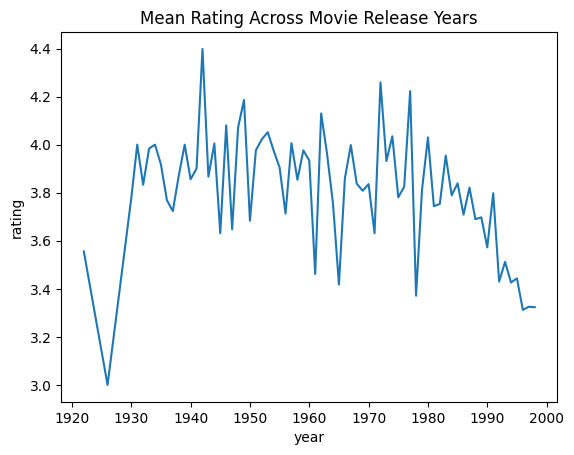

In [ ]:
# 3. How does mean rating change across movie release years?
df_yearly_mean_ratings = df.groupby('year')['rating'].mean()
df_yearly_mean_ratings.plot(kind='line', title='Mean Rating Across Movie Release Years', ylabel='rating')
# something happened in between 1920 to 1930, maybe there were fewer ratings
# in this case it seemed better to keep the axis from 3 to enhance the difference between ratings over the years

<Axes: title={'center': '5 Best-Rated Movies That Have at Least 150 Ratings'}, ylabel='movie title'>

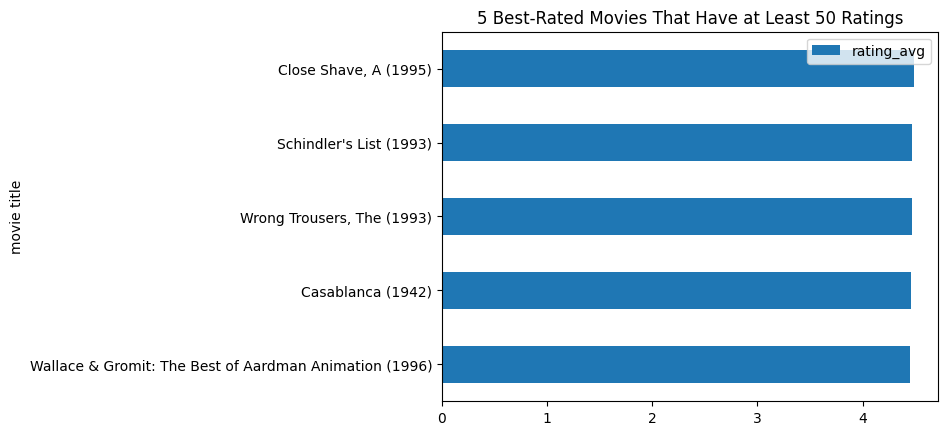

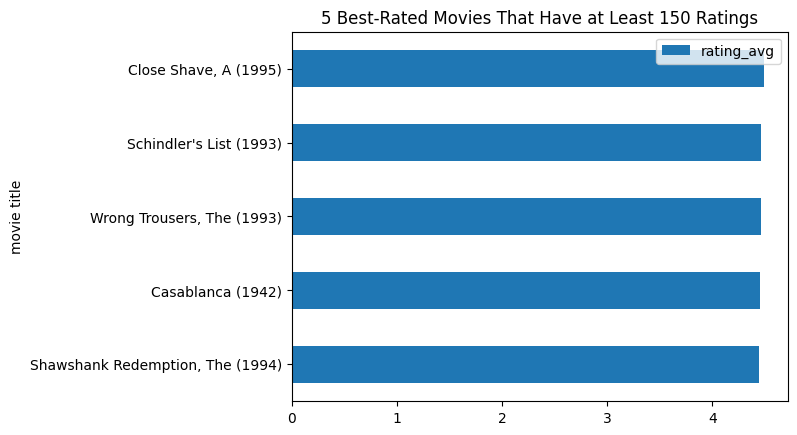

In [ ]:
# 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
# get table with movie id, title, rating count, rating avg
df_movie_id_and_title = df[['movie_id', 'title']].drop_duplicates()
df_movie_id_rating_avg_and_count = df.groupby('movie_id')['rating'].agg(rating_avg='mean', rating_count='count')
df_merged = df_movie_id_and_title.merge(df_movie_id_rating_avg_and_count, how='left', on='movie_id')

df_merged_min_threshold = df_merged[df_merged['rating_count'] >= 50]
df_merged_min_threshold.sort_values(by='rating_avg').tail(5).plot(kind='barh', 
                                                                  x='title', 
                                                                  ylabel='movie title', 
                                                                  y='rating_avg',
                                                                  title='5 Best-Rated Movies That Have at Least 50 Ratings')

df_merged_min_threshold = df_merged[df_merged['rating_count'] >= 150]
df_merged_min_threshold.sort_values(by='rating_avg').tail(5).plot(kind='barh', 
                                                                  x='title', 
                                                                  ylabel='movie title', 
                                                                  y='rating_avg',
                                                                  title='5 Best-Rated Movies That Have at Least 150 Ratings')
# very close ratings, only one movie changed with the switch in rating threshold

# first method but too complicated to follow and plot multiple thresholds
# # get rating counts of each movie id
# movie_rating_counts = df['movie_id'].value_counts()

# # get just the movie id's with at least 50 ratings
# met_rating_count_movie_indexes = movie_rating_counts[movie_rating_counts >= 50].index

# # get df filtered to only movie id's with at least 50 ratings
# df_met_rating_count = df[df['movie_id'].isin(met_rating_count_movie_indexes)]

# # get df of movie id to its mean rating
# df_movie_id_rating_sorted = df_met_rating_count.groupby('movie_id')['rating'].mean().sort_values().reset_index()

# # add title to previous df
# df_movie_rating_sorted = df_movie_id_rating_sorted.merge(df[['movie_id', 'title']].drop_duplicates(), how='left')

# # plot best 5
# df_movie_rating_sorted.tail(5).plot(kind='barh', x='title', y='rating')